# Analysis report 7

## Creating groups (descriptive statistics)
- Calculates the mean value per grouped neighborhood
- Extract the count / mean / std / min / 25% / 50% / 75% / max from a dataframe
- plot the graphs using matplotlib.pyplot


In [65]:
import pandas as pd

data = pd.read_csv('data/residential_rent.csv', sep=';')
data.head(10)


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats

In [66]:
data['Valor'].mean()

5046.172821405663

In [67]:
 neighborhoods = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
 selection = data['Bairro'].isin(neighborhoods)
 data = data[selection]
 data['Bairro'].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
15             Tijuca
19            Ipanema
23           Botafogo
27             Leblon
78           Flamengo
Name: Bairro, dtype: object

In [68]:
neighborhood_group = data.groupby('Bairro')
type(neighborhood_group)

pandas.core.groupby.generic.DataFrameGroupBy

In [69]:
neighborhood_group.groups

{'Barra da Tijuca': [5, 14, 16, 21, 30, 32, 35, 42, 43, 60, 61, 64, 68, 74, 79, 93, 107, 110, 112, 117, 130, 132, 136, 150, 153, 155, 165, 166, 173, 186, 189, 207, 214, 221, 224, 233, 236, 239, 244, 259, 265, 274, 276, 291, 292, 293, 295, 302, 308, 311, 325, 335, 336, 345, 360, 366, 368, 374, 380, 387, 389, 400, 412, 432, 433, 435, 436, 439, 449, 451, 462, 463, 465, 473, 476, 484, 494, 500, 503, 511, 537, 538, 539, 540, 543, 547, 552, 554, 555, 556, 584, 587, 588, 590, 594, 596, 601, 611, 622, 630, ...], 'Botafogo': [23, 48, 87, 88, 111, 119, 127, 134, 196, 200, 225, 334, 362, 415, 416, 498, 524, 526, 545, 593, 649, 685, 719, 756, 765, 822, 827, 861, 915, 924, 928, 1006, 1043, 1080, 1091, 1110, 1116, 1127, 1140, 1165, 1201, 1205, 1223, 1250, 1282, 1295, 1304, 1317, 1348, 1383, 1414, 1419, 1455, 1517, 1529, 1579, 1630, 1655, 1670, 1699, 1741, 1742, 1788, 1814, 1823, 1826, 1853, 1922, 1931, 1957, 1972, 1981, 1989, 2029, 2066, 2069, 2081, 2083, 2084, 2088, 2097, 2148, 2149, 2165, 2179, 21

In [70]:
for neighborhood, n_data in neighborhood_group:
    print('{} => {}'.format(neighborhood, n_data['Valor'].mean()))

Barra da Tijuca => 7069.552938130986
Botafogo => 8791.828178694159
Copacabana => 4126.677004538578
Flamengo => 4113.526610644258
Ipanema => 9352.001133786847
Leblon => 8746.344992050874
Tijuca => 2043.52


In [71]:
neighborhood_group[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Botafogo,8791.83,976.28
Copacabana,4126.68,1148.68
Flamengo,4113.53,1102.15
Ipanema,9352.00,2244.44
Leblon,8746.34,2107.18
Tijuca,2043.52,711.69


# Descriptive statistics

In [72]:
neighborhood_group['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [73]:
neighborhood_group['Valor'].aggregate(['min', 'max', 'sum']).rename(columns = {'min' : 'Minimum', 'max' : 'Maximum'})

,Minimum,Maximum,sum
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


Text(0.5, 1.0, 'Mean rent value by neighborhood')

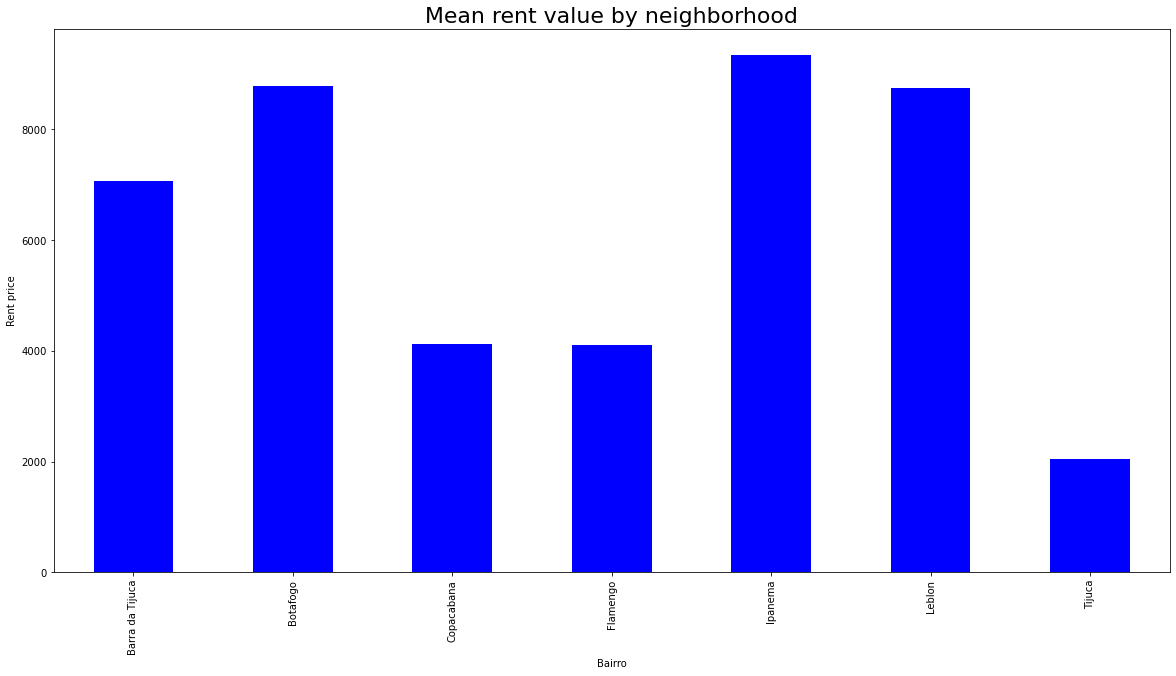

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

fig = neighborhood_group['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Rent price')
fig.set_title('Mean rent value by neighborhood', { 'fontsize': 22 })

Text(0.5, 1.0, 'Mean rent value by neighborhood')

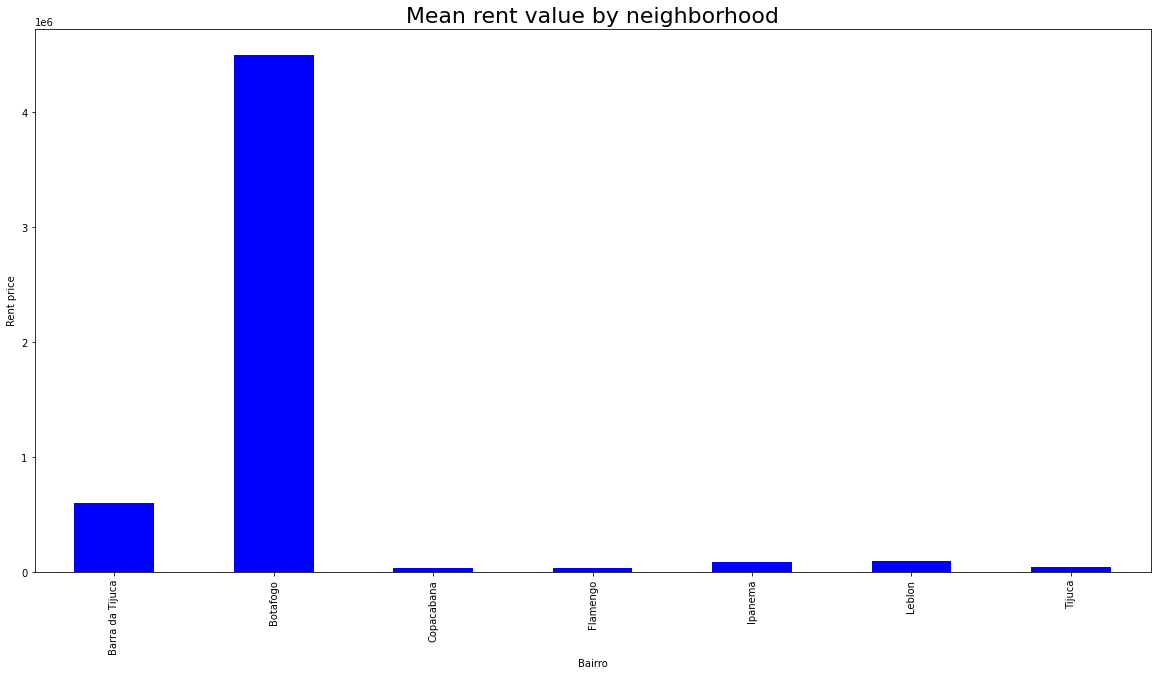

In [75]:
fig = neighborhood_group['Valor'].max().plot.bar(color = 'blue')
fig.set_ylabel('Rent price')
fig.set_title('Mean rent value by neighborhood', { 'fontsize': 22 })